# A Quick Machine Learning Modelling Tutorial with Python and Scikit-Learn 
This notebook goes through a range of common and useful featues of the Scikit-Learn library.

It's long but it's called quick because of how vast the Scikit-Learn library is. Covering everything requires a [full-blown documentation](https://scikit-learn.org/stable/user_guide.html), of which, if you ever get stuck, you should read.

## What is Scikit-Learn (sklearn)?

[Scikit-Learn](https://scikit-learn.org/stable/index.html), also referred to as `sklearn`, is an open-source Python machine learning library.

It's built on top on NumPy (Python library for numerical computing) and Matplotlib (Python library for data visualization).

<img src="../images/sklearn-6-step-ml-framework-tools-scikit-learn-highlight.png" alt="a 6 step machine learning framework along will tools you can use for each step" width="700"/>

## Why Scikit-Learn?

Although the field of machine learning is vast, the main goal is finding patterns within data and then using those patterns to make predictions.

And there are certain categories which a majority of problems fall into.

If you're trying to create a machine learning model to predict whether an email is spam and or not spam, you're working on a classification problem (whether something is something(s) or another).

If you're trying to create a machine learning model to predict the price of houses given their characteristics, you're working on a regression problem (predicting a number).

Once you know what kind of problem you're working on, there are also similar steps you'll take for each. Steps like splitting the data into different sets, one for your machine learning algorithms to learn on and another to test them on.
Choosing a machine learning model and then evaluating whether or not your model has learned anything.

Scikit-Learn offers Python implementations for doing all of these kinds of tasks. Saving you having to build them from scratch.


## What does this notebook cover?

The Scikit-Learn library is very capable. However, learning everything off by heart isn't necessary. Instead, this notebook focuses some of the main use cases of the library.

More specifically, we'll cover:

<img src="../images/sklearn-workflow-title.png" alt="a 6 step scikit-learn workflow"/>

0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline

**Note:** all of the steps in this notebook are focused on **supervised learning** (having data and labels).

After going through it, you'll have the base knolwedge of Scikit-Learn you need to keep moving forward.

## Where can I get help?
If you get stuck or think of something you'd like to do which this notebook doesn't cover, don't fear!

The recommended steps you take are:
1. **Try it** - Since Scikit-Learn has been designed with usability in mind, your first step should be to use what you know and try figure out the answer to your own question (getting it wrong is part of the process). If in doubt, run your code.
2. **Press SHIFT+TAB** - See you can the docstring of a function (information on what the function does) by pressing **SHIFT + TAB** inside it. Doing this is a good habit to develop. It'll improve your research skills and give you a better understanding of the library. 
3. **Search for it** - If trying it on your own doesn't work, since someone else has probably tried to do something similar, try searching for your problem. You'll likely end up in 1 of 2 places:
    * [Scikit-Learn documentation/user guide](https://scikit-learn.org/stable/user_guide.html) - the most extensive resource you'll find for Scikit-Learn information.
    * [Stack Overflow](https://stackoverflow.com/) - this is the developers Q&A hub, it's full of questions and answers of different problems across a wide range of software development topics and chances are, there's one related to your problem.
    
An example of searching for a Scikit-Learn solution might be:

> "how to tune the hyperparameters of a sklearn model"

Searching this on Google leads to the Scikit-Learn documentation for the `GridSearchCV` function: http://scikit-learn.org/stable/modules/grid_search.html

The next steps here are to read through the documentation, check the examples and see if they line up to the problem you're trying to solve. If they do, **rewrite the code** to suit your needs, run it, and see what the outcomes are.

4. **Ask for help** - If you've been through the above 3 steps and you're still stuck, you might want to ask your question on [Stack Overflow](https://www.stackoverflow.com). Be as specific as possible and provide details on what you've tried.

Remember, you don't have to learn all of the functions off by heart to begin with. 

What's most important is continually asking yourself, "what am I trying to do with the data?".

Start by answering that question and then practicing finding the code which does it.

Let's get started.

In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%load_ext autotime

time: 119 µs (started: 2022-06-28 01:48:48 +05:30)


## 0. An end-to-end Scikit-Learn workflow

Before we get in-depth, let's quickly check out what an end-to-end Scikit-Learn workflow might look like.

Once we've seen an end-to-end workflow, we'll dive into each step a little deeper.

**Note:** Since Scikit-Learn is such a vast library, capable of tackling many problems, the workflow we're using is only one example of how you can use it.

### Random Forest Classifier Workflow for Classifying Heart Disease

#### 1. Get the data ready

As an example dataset, we'll import `heart-disease.csv`. This file contains anonymised patient medical records and whether or not they have heart disease or not.

In [3]:
import pandas as pd
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


time: 9.44 ms (started: 2022-06-28 01:48:48 +05:30)


Here, each row is a different patient and all columns except `target` are different patient characteristics. `target` indicates whether the patient has heart disease (`target` = 1) or not (`target` = 0).

In [4]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

time: 1.2 ms (started: 2022-06-28 01:48:48 +05:30)


In [5]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


time: 3.59 ms (started: 2022-06-28 01:48:48 +05:30)


In [6]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

time: 1.86 ms (started: 2022-06-28 01:48:48 +05:30)


In [7]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

time: 302 ms (started: 2022-06-28 01:48:48 +05:30)


#### 2. Choose the model and hyperparameters
This is often referred to as `model` or `clf` (short for classifier) or estimator (as in the Scikit-Learn) documentation.

Hyperparameters are like knobs on an oven you can tune to cook your favourite dish.

In [8]:
# We'll use a Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

time: 33.9 ms (started: 2022-06-28 01:48:49 +05:30)


In [9]:
# We'll leave the hyperparameters as default to begin with...
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

time: 1.32 ms (started: 2022-06-28 01:48:49 +05:30)


#### 3. Fit the model to the data and use it to make a prediction
Fitting the model on the data involves passing it the data and asking it to figure out the patterns. 

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels. 

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier()

time: 55.3 ms (started: 2022-06-28 01:48:49 +05:30)


#### Use the model to make a prediction

The whole point of training a machine learning model is to use it to make some kind of prediction in the future.

Once our model instance is trained, you can use the `predict()` method to predict a target value given a set of features. In other words, use the model, along with some unlabelled data to predict the label. 

Note, data you predict on has to be in the same shape as data you trained on.

In [11]:
# This doesn't work... incorrect shapes
y_label = clf.predict(np.array([0, 2, 3, 4]))

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

time: 492 ms (started: 2022-06-28 01:48:49 +05:30)


In [12]:
# In order to predict a label, data has to be in the same shape as X_train
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2


time: 3.57 ms (started: 2022-06-28 01:48:57 +05:30)


In [13]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X_test)

time: 5.66 ms (started: 2022-06-28 01:48:57 +05:30)


#### 4. Evaluate the model

Now we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good our model is. 

Each model or estimator has a built-in score method. This method compares how well the model was able to learn the patterns between the features and labels. In other words, it returns how accurate your model is.

In [14]:
# Evaluate the model on the training set
clf.score(X_train, y_train)

1.0

time: 7.07 ms (started: 2022-06-28 01:48:58 +05:30)


In [15]:
# Evaluate the model on the test set
clf.score(X_test, y_test)

0.7763157894736842

time: 8.01 ms (started: 2022-06-28 01:48:59 +05:30)


There are also a number of other evaluation methods we can use for our models.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73        36
           1       0.73      0.90      0.81        40

    accuracy                           0.78        76
   macro avg       0.79      0.77      0.77        76
weighted avg       0.79      0.78      0.77        76

time: 2.81 ms (started: 2022-06-28 01:49:00 +05:30)


In [17]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[23, 13],
       [ 4, 36]])

time: 1.82 ms (started: 2022-06-28 01:49:01 +05:30)


In [18]:
accuracy_score(y_test, y_preds)

0.7763157894736842

time: 1.73 ms (started: 2022-06-28 01:49:02 +05:30)


#### 5. Experiment to improve

The first model you build is often referred to as a baseline.

Once you've got a baseline model, like we have here, it's important to remember, this is often not the final model you'll use.

The next step in the workflow is to try and improve upon your baseline model.

And to do this, there's two ways to look at it. From a model perspective and from a data perspective.

From a model perspective this may involve things such as using a more complex model or tuning your models hyperparameters.

From a data perspective, this may involve collecting more data or better quality data so your existing model has more of a chance to learn the patterns within.

If you're already working on an existing dataset, it's often easier try a series of model perspective experiments first and then turn to data perspective experiments if you aren't getting the results you're looking for.

One thing you should be aware of is if you're tuning a models hyperparameters in a series of experiments, your reuslts should always be cross-validated. Cross-validation is a way of making sure the results you're getting are consistent across your training and test datasets (because it uses multiple versions of training and test sets) rather than just luck because of the order the original training and test sets were created. 

* Try different hyperparameters
* All different parameters should be cross-validated 
    * **Note:** Beware of cross-validation for time series problems 
    
Different models you use will have different hyperparameters you can tune. For the case of our model, the `RandomForestClassifier()`, we'll start trying different values for `n_estimators`.

In [19]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 75.0%

Trying model with 20 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 30 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 40 estimators...
Model accuracy on test set: 77.63157894736842%

Trying model with 50 estimators...
Model accuracy on test set: 75.0%

Trying model with 60 estimators...
Model accuracy on test set: 75.0%

Trying model with 70 estimators...
Model accuracy on test set: 78.94736842105263%

Trying model with 80 estimators...
Model accuracy on test set: 73.68421052631578%

Trying model with 90 estimators...
Model accuracy on test set: 75.0%

time: 261 ms (started: 2022-06-28 01:49:03 +05:30)


In [20]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 75.0%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 77.63157894736842%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 77.63157894736842%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 75.0%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 78.94736842105263%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 77.63157894736842%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 77.63157894736842%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 77.63157894736842%
Cross-validation score: 82.81420765027322%

Trying model with 9

In [21]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
grid.best_params_

{'n_estimators': 80}

time: 1.29 s (started: 2022-06-28 01:49:05 +05:30)


In [22]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=80)

time: 1.32 ms (started: 2022-06-28 01:49:07 +05:30)


In [23]:
# Fit the best model
clf = clf.fit(X_train, y_train)

time: 42.1 ms (started: 2022-06-28 01:49:08 +05:30)


In [24]:
# Find the best model scores
clf.score(X_test, y_test)

0.7631578947368421

time: 6.42 ms (started: 2022-06-28 01:49:10 +05:30)


#### 6. Save a model for someone else to use

When you've done a few experiments and you're happy with how your model is doing, you'll likely want someone else to be able to use it.

This may come in the form of a teammate or colleague trying to replicate and validate your results or through a customer using your model as part of a service or application you offer.

Saving a model also allows you to reuse it later without having to go through retraining it. Which is helpful, especially when your training times start to increase.

You can save a scikit-learn model using Python's in-built `pickle` module.

In [25]:
import pickle

# Save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

time: 2.77 ms (started: 2022-06-28 01:49:12 +05:30)


In [26]:
# Load a saved model and make a prediction
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8026315789473685

time: 7 ms (started: 2022-06-28 01:49:13 +05:30)


## 1. Getting the data ready

Data doesn't always come ready to use with a Scikit-Learn machine learning model.

Three of the main steps you'll often have to take are:
* Splitting the data into features (usually `X`) and labels (usually `y`)
* Filling (also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values (also call feature encoding)

Let's see an example.

In [27]:
# Splitting the data into X & y
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


time: 3.9 ms (started: 2022-06-28 01:49:14 +05:30)


In [28]:
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


time: 5.64 ms (started: 2022-06-28 01:49:15 +05:30)


In [29]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

time: 2.07 ms (started: 2022-06-28 01:49:16 +05:30)


In [30]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2) # you can change the test size

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

time: 1.87 ms (started: 2022-06-28 01:49:16 +05:30)


In [31]:
# 80% of data is being used for the test set 
X.shape[0] * 0.8

242.4

time: 1.2 ms (started: 2022-06-28 01:49:17 +05:30)


### 1.1 Make sure it's all numerical
We want to turn the `"Make"` and `"Colour"` columns into numbers.


In [32]:
# Import car-sales-extended.csv
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


time: 4.97 ms (started: 2022-06-28 01:49:19 +05:30)


In [33]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

time: 1.89 ms (started: 2022-06-28 01:49:19 +05:30)


In [34]:
# Split into X & y and train/test
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

time: 1.66 ms (started: 2022-06-28 01:49:20 +05:30)


Now let's try and build a model on our `car_sales` data.

In [35]:
# Try to predict with random forest on price column (doesn't work)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

time: 521 ms (started: 2022-06-28 01:49:21 +05:30)


Oops... this doesn't work, we'll have to convert it to numbers first.

In [36]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

time: 6.51 ms (started: 2022-06-28 01:49:23 +05:30)


In [37]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 3.5431e+04])

time: 1.28 ms (started: 2022-06-28 01:49:24 +05:30)


In [38]:
X.iloc[0]

Make             Honda
Colour           White
Odometer (KM)    35431
Doors                4
Name: 0, dtype: object

time: 1.71 ms (started: 2022-06-28 01:49:25 +05:30)


In [39]:
# Another way... using pandas and pd.get_dummies()
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


time: 2.59 ms (started: 2022-06-28 01:49:26 +05:30)


In [40]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


time: 6.01 ms (started: 2022-06-28 01:49:26 +05:30)


In [41]:
# Have to convert doors to object for dummies to work on it...
car_sales["Doors"] = car_sales["Doors"].astype(object)
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

/opt/homebrew/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


time: 10.4 ms (started: 2022-06-28 01:49:27 +05:30)


In [42]:
# The categorical categories are now either 1 or 0...
X["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

time: 1.75 ms (started: 2022-06-28 01:49:28 +05:30)


In [43]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

time: 118 ms (started: 2022-06-28 01:49:29 +05:30)


In [44]:
model.score(X_test, y_test)

0.3235867221569877

time: 7.03 ms (started: 2022-06-28 01:49:30 +05:30)


### 1.2 What if there were missing values?

Many machine learning models don't work well when there are missing values in the data.

There are two main options when dealing with missing values.

1. Fill them with some given value. For example, you might fill missing values of a numerical column with the mean of all the other values. The practice of filling missing values is often referred to as imputation.
2. Remove them. If a row has missing values, you may opt to remove them completely from your sample completely. However, this potentially results in using less data to build your model.

**Note:** Dealing with missing values is a problem to problem issue. And there's often no best way to do it.

In [45]:
# Import car sales dataframe with missing values
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


time: 6.38 ms (started: 2022-06-28 01:49:31 +05:30)


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

time: 2.3 ms (started: 2022-06-28 01:49:32 +05:30)


In [47]:
# Let's convert the categorical columns to one hot encoded (code copied from above)
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

time: 6.09 ms (started: 2022-06-28 01:49:32 +05:30)


Ahh... this doesn't work. We'll have to either fill or remove the missing values.

Let's see what values are missing again.

In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

time: 2.27 ms (started: 2022-06-28 01:49:34 +05:30)


### 1.2.1 Fill missing data with pandas

What we'll do is fill the rows where categorical values are missing with `"missing"`, the numerical features with the mean or 4 for the doors. And drop the rows where the Price is missing. 

We could fill Price with the mean, however, since it's the target variable, we don't want to be introducing too many fake labels.

**Note:** The practice of filling missing data is called **imputation**. And it's important to remember there's no perfect way to fill missing data. The methods we're using are only one of many. The techniques you use will depend heavily on your dataset. A good place to look would be searching for "data imputation techniques".

In [49]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

time: 534 µs (started: 2022-06-28 01:49:36 +05:30)


In [50]:
# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

time: 488 µs (started: 2022-06-28 01:49:36 +05:30)


In [51]:
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

time: 990 µs (started: 2022-06-28 01:49:36 +05:30)


In [52]:
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

time: 802 µs (started: 2022-06-28 01:49:37 +05:30)


In [53]:
# Check our dataframe
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

time: 2.49 ms (started: 2022-06-28 01:49:37 +05:30)


In [54]:
# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)

time: 1.57 ms (started: 2022-06-28 01:49:38 +05:30)


In [55]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

time: 2.19 ms (started: 2022-06-28 01:49:38 +05:30)


We've removed the rows with missing Price values, now there's less data but there's no more missing values.

In [56]:
len(car_sales_missing)

950

time: 1.01 ms (started: 2022-06-28 01:49:40 +05:30)


In [57]:
# Now let's one-hot encode the categorical columns (copied from above)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

time: 4.42 ms (started: 2022-06-28 01:49:40 +05:30)


In [58]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 3.5431e+04,
       1.5323e+04])

time: 1.1 ms (started: 2022-06-28 01:49:41 +05:30)


### 1.2.2 Filling missing data and transforming categorical data with Scikit-Learn

Now we've filled the missing columns using pandas functions, you might be thinking, "Why pandas? I thought this was a Scikit-Learn introduction?".

Not to worry, scikit-learn provides another method called [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) which allows us to do a similar thing.

`SimpleImputer()` transforms data by filling missing values with a given strategy.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no mising values.

In [59]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

time: 4.09 ms (started: 2022-06-28 01:49:42 +05:30)


Let's reimport it so it has missing values and we can fill them with Scikit-Learn.

In [60]:
# Reimport the DataFrame
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

time: 3.36 ms (started: 2022-06-28 01:49:43 +05:30)


In [61]:
# Drop the rows with missing in the "Price" column
car_sales_missing.dropna(subset=["Price"], inplace=True)

time: 1.42 ms (started: 2022-06-28 01:49:43 +05:30)


In [62]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

time: 2.09 ms (started: 2022-06-28 01:49:44 +05:30)


In [63]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

time: 1.88 ms (started: 2022-06-28 01:49:44 +05:30)


**Note:** We split data into train & test to perform filling missing values on them separately.

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

time: 2.82 ms (started: 2022-06-28 01:49:45 +05:30)


In [65]:
# Fill categorical values with 'missing' & numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

time: 310 µs (started: 2022-06-28 01:49:45 +05:30)


In [66]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

time: 226 µs (started: 2022-06-28 01:49:45 +05:30)


**Note:** We use `fit_transform()` on the training data and `transform()` on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [67]:
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

time: 9.06 ms (started: 2022-06-28 01:49:46 +05:30)


In [68]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

time: 2.75 ms (started: 2022-06-28 01:49:47 +05:30)


In [69]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

time: 2.07 ms (started: 2022-06-28 01:49:47 +05:30)


In [70]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

time: 7.03 ms (started: 2022-06-28 01:49:48 +05:30)


In [71]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

time: 181 ms (started: 2022-06-28 01:49:48 +05:30)


If this looks confusing, don't worry, we've covered a lot of ground very quickly. And we'll revisit these strategies in a future section in way which makes a lot more sense.

For now, the key takeaways to remember are:
* Most datasets you come across won't be in a form ready to immediately start using them with machine learning models. And some may take more preparation than others to get ready to use.
* For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as **feature engineering** or **feature encoding**.
* Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as **data imputation**.

## 2. Choosing the right estimator/algorithm for your problem

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:
* Sklearn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

If you know what kind of problem you're working with, one of the next places you should look at is the [Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them. If you do start to apply different algorithms but they don't seem to be working, that's when you'd start to look deeper into each one.

Let's check out the cheatsheet and follow it for some of the problems we're working on.

<img src="../images/sklearn-ml-map.png" width=700/>

You can see it's split into four main categories. Regression, classification, clustering and dimensionality reduction. Each has their own different purpose but the Scikit-Learn team has designed the library so the workflows for each are relatively similar.

Let's start with a regression problem (trying to predict a number). We'll use the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) built into Scikit-Learn's `datasets` module.

The goal of the California Housing dataset is to predict a given district's median house value (in hundreds of thousands of dollars) on things like the age of the home, the number of rooms, the number of bedrooms, number of people living the home and more.

### 2.1 Picking a machine learning model for a regression problem

In [72]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing; # gets downloaded as dictionary

time: 2.47 s (started: 2022-06-28 01:49:53 +05:30)


Since it's in a dictionary, let's turn it into a DataFrame so we can inspect it better.

In [73]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


time: 4.86 ms (started: 2022-06-28 01:50:00 +05:30)


In [74]:
# How many samples?
len(housing_df)

20640

time: 1.28 ms (started: 2022-06-28 01:50:01 +05:30)


Beautiful, our goal here is to use the feature columns, such as:
* `MedInc` - median income in block group
* `HouseAge` - median house age in block group
* `AveRooms` - average number of rooms per household
* `AveBedrms` - average number of bedrooms per household

To predict the `target` column which expresses the median house value for specfici California districts in hundreds of thousands of dollars ($100,000). 

In essence, each row is a different district in California (the data) and we're trying to build a model to predict the median house value in that distract (the target/label) given a series of attributes about the houses in that district.

Since we have data and labels, this is a supervised learning problem. And since we're trying to predict a number, it's a regression problem.

Knowing these two things, how do they line up on the Scikit-Learn machine learning algorithm cheat-sheet?

<img src="../images/sklearn-ml-map-cheatsheet-california-housing-ridge.png" width=700/>

Following the map through, knowing what we know, it suggests we try [`RidgeRegression`](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). Let's chek it out.

In [75]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score() metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.5758549611440126

time: 19.1 ms (started: 2022-06-28 01:50:02 +05:30)


What if `RidgeRegression` didn't work? Or what if we wanted to improve our results?

<img src="../images/sklearn-ml-map-cheatsheet-california-housing-ensemble.png" width=700/>

Following the diagram, the next step would be to try [`EnsembleRegressors`](https://scikit-learn.org/stable/modules/ensemble.html). Ensemble is another word for multiple models put together to make a decision.

One of the most common and useful ensemble methods is the [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest). Known for its fast training and prediction times and adaptibility to different problems.

The basic premise of the Random Forest is to combine a number of different decision trees, each one random from the other and make a prediction on a sample by averaging the result of each decision tree.

An in-depth discussion of the Random Forest algorithm is beyond the scope of this notebook but if you're interested in learning more, [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen is a great read.

Since we're working with regression, we'll use Scikit-Learn's [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

We can use the exact same workflow as above. Except for changing the model.

In [76]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.8066196804802649

time: 6.77 s (started: 2022-06-28 01:50:05 +05:30)


Woah, we get a boost in score on the test set of over 0.2 with a change of model.

At first, the diagram can seem confusing. But once you get a little practice applying different models to different problems, you'll start to pick up which sorts of algorithms do better with different types of data.

### 2.2 Picking a machine learning model for a classification problem
Now, let's check out the choosing process for a classification problem.

Say you were trying to predict whether or not a patient had heart disease based on their medical records.

The dataset in `../data/heart-disease.csv` contains data for just that problem.

In [77]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


time: 4.64 ms (started: 2022-06-28 01:50:13 +05:30)


In [78]:
# How many samples are there?
len(heart_disease)

303

time: 1.25 ms (started: 2022-06-28 01:50:13 +05:30)


Similar to the California Housing dataset, here we want to use all of the available data to predict the target column (1 for if a patient has heart disease and 0 for if they don't).

So what do we know?

We've got 303 samples (1 row = 1 sample) and we're trying to predict whether or not a patient has heart disease.

Because we're trying to predict whether each sample is one thing or another, we've got a classification problem.

Let's see how it lines up with our [Scikit-Learn algorithm cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

<img src="../images/sklearn-ml-map-cheatsheet-heart-disease-linear-svc.png" width=700/>

Following the cheat-sheet we end up at [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) which stands for Linear Support Vector Classifier. Let's try it on our data. 

In [79]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

time: 17.4 ms (started: 2022-06-28 01:50:15 +05:30)


Straight out of the box (with no tuning or improvements) the model scores 47% accuracy, which with 2 classes (heart disease or not) is as good as guessing.

With this result, we'll go back to our diagram and see what our options are.

<img src="../images/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png" width=700/>

Following the path (and skipping a few, don't worry, we'll get to this) we come up to [`EnsembleMethods`](https://scikit-learn.org/stable/modules/ensemble.html) again. Except this time, we'll be looking at ensemble classifiers instead of regressors.

Remember our [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from above? We'll it has a dance partner, [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) which is an ensemble based machine model learning model for classification. You might be able to guess what we can use it for.

Let's try.

In [80]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

time: 57.1 ms (started: 2022-06-28 01:50:16 +05:30)


Using the `RandomForestClassifier` we get almost double the score of `LinearSVC`.

One thing to remember, is both models are yet to receive any hyperparameter tuning. Hyperparameter tuning is fancy term for adjusting some settings on a model to try and make it better. It usually happens once you've found a decent baseline result you'd like to improve upon.

In this case, we'd probably take the `RandomForestClassifier` and try and improve it with hyperparameter tuning (which we'll see later on).

### What about the other models?

Looking at the cheat-sheet and the examples above, you may have noticed we've skipped a few.

Why?

The first reason is time. Covering every single one would take a fair bit longer than what we've done here. And the second one is the effectiveness of ensemble methods.

A little tidbit for modelling in machine learning is:
* If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.
* If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.

For this notebook, we're focused on structured data, which is why the Random Forest has been our model of choice.

If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:
* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### Experiment until something works

The beautiful thing is, the way the Scikit-Learn API is designed, once you know the way with one model, using another is much the same.

And since a big part of being a machine learning engineer or data scientist is experimenting, you might want to try out some of the other models on the cheat-sheet and see how you go. The more you can reduce the time between experiments, the better.

## 3. Fit the model to data and using it to make predictions

Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

If you've followed through, you've seen a few examples of this already.

### 3.1 Fitting a model to data

In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the `fit()` method and passing it data, such as, `fit(X, y)`.

Where `X` is a feature array and `y` is a target array.

Other names for `X` include:
* Data
* Feature variables
* Features

Other names for `y` include:
* Labels
* Target variable

For supervised learning there is usually an `X` and `y`. For unsupervised learning, there's no `y` (no labels).

Let's revisit the example of using patient data (`X`) to predict whether or not they have heart disease (`y`).

In [81]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

time: 58.1 ms (started: 2022-06-28 01:50:18 +05:30)


What's happening here?

Calling the `fit()` method will cause the machine learning algorithm to attempt to find patterns between `X` and `y`. Or if there's no `y`, it'll only find the patterns within `X`.

Let's see `X`.

In [82]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


time: 3.3 ms (started: 2022-06-28 01:50:19 +05:30)


And `y`.

In [83]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

time: 1.64 ms (started: 2022-06-28 01:50:20 +05:30)


Passing `X` and `y` to `fit()` will cause the model to go through all of the examples in `X` (data) and see what their corresponding `y` (label) is.

How the model does this is different depending on the model you use.

Explaining the details of each would take an entire textbook. 

For now, you could imagine it similar to how you would figure out patterns if you had enough time. 

You'd look at the feature variables, `X`, the `age`, `sex`, `chol` (cholesterol) and see what different values led to the labels, `y`, `1` for heart disease, `0` for not heart disease.

This concept, regardless of the problem, is similar throughout all of machine learning.

**During training (finding patterns in data):**

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict something and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

**During testing or in production (using learned patterns):**

A machine learning algorithm uses the patterns its previously learned in a dataset to make a prediction on some unseen data.

### 3.2 Making predictions using a machine learning model
Now we've got a trained model, one which has hoepfully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways. Two of the most common and useful are [`predict()`](https://github.com/scikit-learn/scikit-learn/blob/5f3c3f037/sklearn/multiclass.py#L299) and [`predict_proba()`](https://github.com/scikit-learn/scikit-learn/blob/5f3c3f037/sklearn/linear_model/_logistic.py#L1617).

Let's see them in action.

In [84]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

time: 6.91 ms (started: 2022-06-28 01:50:22 +05:30)


Given data in the form of `X`, the `predict()` function returns labels in the form of `y`.

It's standard practice to save these predictions to a variable named something like `y_preds` for later comparison to `y_test` or `y_true` (usually same as `y_test` just another name).

In [85]:
# Compare predictions to truth
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

time: 6.32 ms (started: 2022-06-28 01:50:23 +05:30)


Another way of doing this is with Scikit-Learn's [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function.

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

time: 1.51 ms (started: 2022-06-28 01:50:23 +05:30)


**Note:** For the `predict()` function to work, it must be passed `X` (data) in the same format the model was trained on. Anything different and it will return an error.

`predict_proba()` returns the probabilities of a classification label.

In [87]:
# Return probabilities rather than labels
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

time: 6.79 ms (started: 2022-06-28 01:50:24 +05:30)


Let's see the difference.

In [88]:
# Return labels
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

time: 6.55 ms (started: 2022-06-28 01:50:25 +05:30)


`predict_proba()` returns an array of five arrays each containing two values.

Each number is the probability of a label given a sample.

In [89]:
# Find prediction probabilities for 1 sample
clf.predict_proba(X_test[:1])

array([[0.89, 0.11]])

time: 6.65 ms (started: 2022-06-28 01:50:26 +05:30)


This output means the sample `X_test[:1]`, the model is predicting label 0 (index 0) with a probability score of 0.9.

Because the score is over 0.5, when using `predict()`, a label of 0 is assigned.

In [90]:
# Return the label for 1 sample
clf.predict(X_test[:1])

array([0])

time: 6.1 ms (started: 2022-06-28 01:50:27 +05:30)


Where does 0.5 come from?

Because our problem is a binary classification task (heart disease or not heart disease), predicting a label with 0.5 probability every time would be the same as a coin toss (guessing). Therefore, once the prediction probability of a sample passes 0.5, for a certain label, it's assigned that label.

`predict()` can also be used for regression models.

In [91]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

time: 6.75 s (started: 2022-06-28 01:50:28 +05:30)


In [92]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

time: 1.53 ms (started: 2022-06-28 01:50:35 +05:30)


Now we've seen how to get a model how to find patterns in data using the `fit()` function and make predictions using what its learned using the `predict()` and `predict_proba()` functions, it's time to evaluate those predictions.

## 4. Evaluating a model

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

1. The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The `scoring` parameter. This parameter can be passed to methods such as [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

### 4.1 General model evaluation with `score()`

If we bring down the code from our previous classification problem (building a classifier to predict whether or not someone has heart disease based on their medical records).

We can see the `score()` method come into play.

In [93]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

time: 53 ms (started: 2022-06-28 01:50:35 +05:30)


Once the model has been fit on the training data (`X_train`, `y_train`), we can call the `score()` method on it and evaluate our model on the test data, data the model has never seen before (`X_test`, `y_test`).

In [94]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

time: 5.97 ms (started: 2022-06-28 01:50:35 +05:30)


Because `clf` is an instance of `RandomForestClassifier`, the `score()` method uses mean accuracy as its score method.

You can find this by pressing **SHIFT + TAB** within the brackets of `score()` when called on a model instance.

Behind the scenes, `score()` makes predictions on `X_test` using the trained model and then compares those predictions to the actual labels `y_test`.

A model which predicts everything 100% correct would receive a score of 1.0 (or 100%).

Our model doesn't get everything correct, but at 85% (0.85 * 100), it's still far better than guessing.

Let's do the same but with the regression code from above.

In [95]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

time: 6.65 s (started: 2022-06-28 01:50:35 +05:30)


Due to the consistent design of the Scikit-Learn library, we can call the same `score()` method on `model`.

In [96]:
# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8066196804802649

time: 90.3 ms (started: 2022-06-28 01:50:42 +05:30)


Here, `model` is an instance of `RandomForestRegressor`. And since it's a regression model, the default metric built into `score()` is the coefficient of determination or R^2 (pronounced R-sqaured).

Remember, you can find this by pressing **SHIFT + TAB** within the brackets of `score()` when called on a model instance.

The best possible value here is 1.0, this means the model predicts the target regression values exactly.

Calling the `score()` method on any model instance and passing it test data is a good quick way to see how your model is going.

However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

### 4.2 Evaluating your models using the `scoring` parameter 

The next step up from using `score()` is to use a custom `scoring` parameter with [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

As you may have guessed, the `scoring` parameter you set will be different depending on the problem you're working on.

We'll see some specific examples of different parameters in a moment but first let's check out `cross_val_score()`.

To do so, we'll copy the heart disease classification code from above and then add another line at the top.

In [97]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

time: 54 ms (started: 2022-06-28 01:50:42 +05:30)


Using `cross_val_score()` is slightly different to `score()`. Let's see a code example first and then we'll go through the details.

In [98]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

time: 6.54 ms (started: 2022-06-28 01:50:42 +05:30)


In [99]:
# Using cross_val_score()
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

time: 274 ms (started: 2022-06-28 01:50:42 +05:30)


What's happening here?

The first difference you might notice is `cross_val_score()` returns an array where as `score()` only returns a single number.

`cross_val_score()` returns an array because of a parameter called `cv`, which stands for cross-validation.

When `cv` isn't set, `cross_val_score()` will return an array of 3 numbers by default (or 5 by default if you're using Scikit-Learn version 0.22+).

Remember, you can see the parameters of a function using **SHIFT + TAB** from within the brackets.

But wait, you might be thinking, what even is cross-validation?

A visual might be able to help.

<img src='../images/sklearn-cross-validation.png' width=600/>

We've dealt with Figure 1.0 before using `score(X_test, y_test)`. But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset. For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly. The same goes for the reverse.

Figure 2.0 shows 5-fold cross-validation, a method which tries to provide a solution to:

1. Not training on all the data
2. Avoiding getting lucky scores on single splits of the data

Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. On a different split each time, returning a score for each.

Why 5-fold?

The actual name of this setup K-fold cross-validation. Where K is an abitrary number. We've used 5 because it looks nice visually, and will be the default in Scikit-Learn from version 0.22 onwards.

Figure 2.0 is what happens when we run the following.

In [100]:
# 5-fold cross-validation
cross_val_score(clf, X, y, cv=5) # cv is equivalent to K

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

time: 274 ms (started: 2022-06-28 01:50:43 +05:30)


Since we set `cv=5` (5-fold cross-validation), we get back 5 different scores instead of 1.

Taking the mean of this array gives us a more in-depth idea of how our model is performing by converting the 5 scores into one.

Notice, the average `cross_val_score()` is slightly lower than single value returned by `score()`.

In [101]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

time: 266 ms (started: 2022-06-28 01:50:47 +05:30)


In this case, if you were asked to report the accuracy of your model, even though it's lower, you'd prefer the cross-validated metric over the non-cross-validated metric.

Wait?

We haven't used the `scoring` parameter at all.

By default, it's set to `None`.

In [102]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

time: 271 ms (started: 2022-06-28 01:50:49 +05:30)


When `scoring` is set to `None` (by default), it uses the same metric as `score()` for whatever model is passed to `cross_val_score()`.

In this case, our model is `clf` which is an instance of `RandomForestClassifier` which uses mean accuracy as the default `score()` metric.

You can change the evaluation score `cross_val_score()` uses by changing the `scoring` parameter.

And as you might have guessed, different problems call for different evaluation scores.

The [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) outlines a vast range of evaluation metrics for different problems but let's have a look at a few.

### 4.2.1 Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples.

In [103]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

time: 55.3 ms (started: 2022-06-28 01:50:51 +05:30)


#### Accuracy
Accuracy is the default metric for the `score()` function within each of Scikit-Learn's classifier models. And it's probably the metric you'll see most often used for classification problems.

However, we'll see in a second how it may not always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easily convert it to a percentage.

In [104]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%
time: 6.26 ms (started: 2022-06-28 01:50:51 +05:30)


#### Area Under Receiver Operating Characteristic (ROC) Curve
If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.

In [105]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

time: 7.47 ms (started: 2022-06-28 01:50:52 +05:30)


Looking at these on their own doesn't make much sense. It's much easier to see their value visually. 

Since Scikit-Learn doesn't have a built-in function to plot a ROC curve, quite often, you'll find a function (or write your own) like the one below.

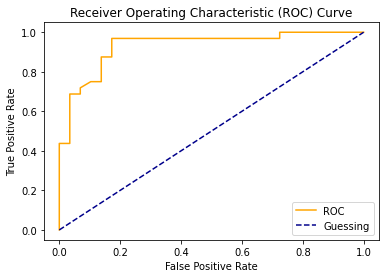

time: 65.3 ms (started: 2022-06-28 01:50:54 +05:30)


In [106]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

Looking at the plot for the first time, it might seem a bit confusing.

The main thing to take away here is our model is doing far better than guessing.

A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve). Scikit-Learn implements a function to caculate this called [`roc_auc_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score). 

The maximum ROC AUC score you can achieve is 1.0 and generally, the closer to 1.0, the better the model.

In [107]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.9304956896551724

time: 2.6 ms (started: 2022-06-28 01:50:55 +05:30)


The most ideal position for a ROC curve to run along the top left corner of the plot. 

This would mean the model predicts only true positives and no false positives. And would result in a ROC AUC score of 1.0.

You can see this by creating a ROC curve using only the `y_test` labels.

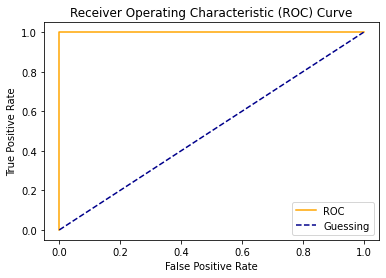

time: 53.2 ms (started: 2022-06-28 01:50:56 +05:30)


In [108]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [109]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

time: 2.22 ms (started: 2022-06-28 01:50:57 +05:30)


In reality, a perfect ROC curve is unlikely.

#### Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [110]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

time: 6.03 ms (started: 2022-06-28 01:50:57 +05:30)


Again, this is probably easier visualized.

One way to do it is with `pd.crosstab()`.

In [111]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


time: 6.5 ms (started: 2022-06-28 01:50:59 +05:30)


#### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - this takes a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.
2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

> **Note:** Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:
```python
import sklearn
sklearn.__version__
```
> If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

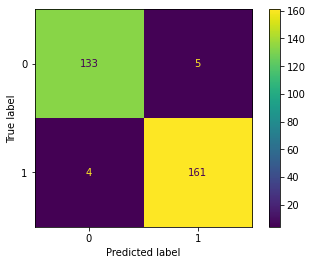

time: 66.9 ms (started: 2022-06-28 01:51:01 +05:30)


In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

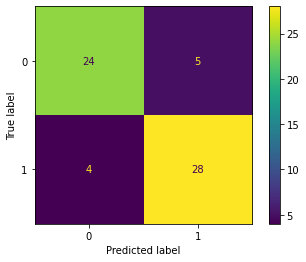

time: 59.3 ms (started: 2022-06-28 01:51:02 +05:30)


In [113]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

#### Classification report

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

Let's see one.

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

time: 3 ms (started: 2022-06-28 01:51:03 +05:30)


It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:
* **Precision** - Indicates the proportion of positive identifications (model predicted class `1`) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great!
...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [115]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


time: 17 ms (started: 2022-06-28 01:51:04 +05:30)


You can see here, we've got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0.

Ask yourself, although the model achieves 99.99% accuracy, is it useful?

To summarize:
* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

### 4.2.2 Regression model evaluation metrics

Similar to classification, there are [several metrics you can use to evaluate your regression models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

We'll check out the following.

1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Let's see them in action. First, we'll bring down our regression model code again.

In [116]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

time: 6.68 s (started: 2022-06-28 01:51:04 +05:30)


**R^2 Score (coefficient of determination)**

Once you've got a trained regression model, the default evaluation metric in the `score()` function is R^2.

In [117]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.8066196804802649

time: 89.7 ms (started: 2022-06-28 01:51:11 +05:30)


Outside of the `score()` function, R^2 can be calculated using Scikit-Learn's [`r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) function.

A model which only predicted the mean would get a score of 0.

In [118]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

time: 2.19 ms (started: 2022-06-28 01:51:11 +05:30)


And a perfect model would get a score of 1. 

In [119]:
r2_score(y_test, y_test)

1.0

time: 1.6 ms (started: 2022-06-28 01:51:11 +05:30)


For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

**Mean Absolute Error (MAE)**

A model's mean absolute error can be calculated with Scikit-Learn's [`mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) function.

In [120]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

time: 90.1 ms (started: 2022-06-28 01:51:14 +05:30)


Our model achieves an MAE of 0.3265. This means, on average our models predictions are 0.3265 units away from the actual value.

Let's make it a little more visual.

In [121]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df

,actual values,predictions
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760
...,...,...
15362,2.63300,2.220380
16623,2.66800,1.947760
18086,5.00001,4.836378
2144,0.72300,0.717820


time: 3.32 ms (started: 2022-06-28 01:51:15 +05:30)


You can the predictions are slightly different to the actual values.

Depending what problem you're working on, having a difference like we do now, might be okay. On the flip side, it may also not be okay, meaning the predictions would have to be closer.

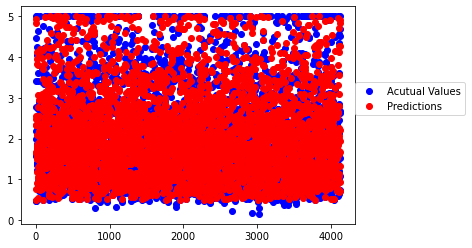

time: 74.8 ms (started: 2022-06-28 01:51:16 +05:30)


In [122]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

**Mean Squared Error (MSE)**

How about MSE? We can calculate it with Scikit-Learn's [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [123]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

time: 1.89 ms (started: 2022-06-28 01:51:17 +05:30)


MSE will always be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

Now you might be thinking, which regression evaluation metric should you use?

* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are). 
    * Pay more attention to MAE: When being \$10,000 off is ***twice*** as bad as being \$5,000 off.
    * Pay more attention to MSE: When being \$10,000 off is ***more than twice*** as bad as being \$5,000 off.
    
**Note:** What we've covered here is only a handful of potential metrics you can use to evaluate your models. If you're after a complete list, check out the [Scikit-Learn metrics and scoring documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

### 4.2.3 Finally using the `scoring` parameter

Woah. We've covered a bunch but haven't even touched the `scoring` parameter...

As a refresh, the `scoring` parameter can be used with a function like `cross_val_score()` to tell Scikit-Learn what evaluation metric to return using cross-validation.

Let's check it out with our classification model and the heart disease dataset.

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

time: 752 µs (started: 2022-06-28 01:51:19 +05:30)


First, we'll use the default, which is mean accuracy.

In [125]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

time: 274 ms (started: 2022-06-28 01:51:19 +05:30)


We've seen this before, now we got 5 different accuracy scores on different test splits of the data.

Averaging this gives the cross-validated accuracy.

In [126]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%
time: 469 µs (started: 2022-06-28 01:51:20 +05:30)


We can find the same using the `scoring` parameter and passing it `"accuracy"`.

In [127]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%
time: 274 ms (started: 2022-06-28 01:51:20 +05:30)


The same goes for the other metrics we've been using for classification.

Let's try `"precision"`.

In [128]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83
time: 267 ms (started: 2022-06-28 01:51:22 +05:30)


How about `"recall"`?

In [129]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85
time: 255 ms (started: 2022-06-28 01:51:22 +05:30)


And `"f1"` (for F1 score)?

In [130]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84
time: 257 ms (started: 2022-06-28 01:51:23 +05:30)


We can repeat this process with our regression metrics.

Let's revisit our regression model.

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

time: 7.4 ms (started: 2022-06-28 01:51:24 +05:30)


The default is `"r2"`.

In [132]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.65
time: 33.6 s (started: 2022-06-28 01:51:24 +05:30)


But we can use `"neg_mean_absolute_error"` for MAE (mean absolute error).

In [133]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -0.47
time: 33.5 s (started: 2022-06-28 01:51:58 +05:30)


Why the `"neg_"`?

Because Scikit-Learn documentation states:
> ["All scorer objects follow the convention that higher return values are better than lower return values."](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

Which in this case, means a lower negative value (closer to 0) is better.

What about `"neg_mean_squared_error"` for MSE (mean squared error)?

In [134]:
np.random.seed(42)
cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -0.43
time: 33.5 s (started: 2022-06-28 01:52:31 +05:30)


### 4.3 Using different evaluation metrics with Scikit-Learn

Remember the third way of evaluating Scikit-Learn functions?

> 3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called `y_preds` to an array of actual labels, usually called `y_test` or `y_true`.

#### Classification functions
For:
* Accuracy we can use [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* Precision we can use [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall we can use [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1 we can use [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86
time: 62.8 ms (started: 2022-06-28 01:53:05 +05:30)


The same goes for the regression problem.

#### Regression metrics

For:
* R^2 we can use [`r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
* MAE (mean absolute error) we can use [`mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
* MSE (mean squared error) we can use [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [136]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25
time: 6.77 s (started: 2022-06-28 01:53:05 +05:30)


Wow. We've covered a lot. But it's worth it. Because evaluating a model's predictions is paramount in any machine learning project.

There's nothing worse than training a machine learning model and optimizing for the wrong evaluation metric.

Keep the metrics and evaluation methods we've gone through when training your future models.

If you're after extra reading, I'd go through the [Scikit-Learn documentation for evaluation metrics](https://scikit-learn.org/stable/modules/model_evaluation.html).

Now we've seen some different metrics we can use to evaluate a model, let's see some ways we can improve those metrics. 

## 5.  Improving model predictions through experimentation (hyperparameter tuning)

The first predictions you make with a model are generally referred to as baseline predictions. The same goes with the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

From a data perspective asks:
* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:
* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the **hyperparameters** be tuned to make it even better?

**Note:** Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a user (you) can adjust.

Since we have two existing datasets, we'll come at exploration from a model perspective.

More specifically, we'll look at how we could improve our `RandomForestClassifier` and `RandomForestRegressor` models through hyperparameter tuning.

What even are hyperparameters?

Good question, let's check it out. First, we'll instantiate a `RandomForestClassifier`.

In [137]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

time: 317 µs (started: 2022-06-28 01:53:12 +05:30)


When you instantiate a model like above, you're using the default hyperparameters.

These get printed out when you call the model instance and `get_params()`.

In [138]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

time: 1.35 ms (started: 2022-06-28 01:53:12 +05:30)


You'll see things like `max_depth`, `min_samples_split`, `n_estimators`.

Each of these is a hyperparameter of the `RandomForestClassifier` you can adjust. 

You can think of hyperparameters as being similar to dials on an oven. On the default setting your oven might do an okay job cooking your favourite meal. But with a little experimentation, you find it does better when you adjust the settings. 

<img src="../images/sklearn-hyperparameter-tuning-oven.png" width=400/>

The same goes for imporving a machine learning model by hyperparameter tuning. The default hyperparameters on a machine learning model may find patterns in data well. But there's a chance a adjusting the hyperparameters may improve a models performance.

Every machine learning model will have different hyperparameters you can tune.

You might be thinking, "how the hell do I remember all of these?"

And it's a good question. It's why we're focused on the Random Forest. Instead of memorizing all of the hyperparameters for every model, we'll see how it's done with one. And then knowing these principles, you can apply them to a different model if needed.

Reading the [Scikit-Learn documentation for the Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), you'll find they suggest trying to change `n_estimators` (the number of trees in the forest) and `min_samples_split` (the minimum number of samples required to split an internal node).

We'll try tuning these as well as:
* `max_features` (the number of features to consider when looking for the best split)
* `max_depth` (the maximum depth of the tree)
* `min_samples_leaf` (the minimum number of samples required to be at a leaf node)

If this still sounds like a lot, the good news is, the process we're taking with the Random Forest and tuning its hyperparameters, can be used for other machine learning models in Scikit-Learn. The only difference is, with a different model, the hyperparameters you tune will be different.

Adjusting hyperparameters is usually an experimental process to figure out which are best. As there's no real way of knowing which hyperparameters will be best when starting out.

To get familar with hyparameter tuning, we'll take our RandomForestClassifier and adjust its hyperparameters in 3 ways.

1. By hand
2. Randomly with [RandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
3. Exhaustively with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### 5.1 Tuning hyperparameters by hand 

So far we've worked with training and test datasets.

You train a model on a training set and evaluate it on a test dataset.

But hyperparameter tuning introduces a thrid set, a validation set.

Now the process becomes, train a model on the training data, (try to) improve its hyperparameters on the validation set and evaluate it on the test set.

If our starting dataset contained 100 different patient records labels indicating who had heart disease and who didn't and we wanted to build a machine learning model to predict who had heart disease and who didn't, it might look like this:

<img src="../images/sklearn-train-valid-test-annotated.png" width=500/>

Since we know we're using a `RandomForestClassifier` and we know the hyperparameters we want to adjust, let's see what it looks like.

First, let's remind ourselves of the base parameters.

In [139]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

time: 1.76 ms (started: 2022-06-28 01:53:12 +05:30)


And we're going to adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

We'll use the same code as before, except this time we'll create a training, validation and test split.

With the training set containing 70% of the data and the validation and test sets each containing 15%.

Let's get some baseline results, then we'll tune the model.

And since we're going to be evaluating a few models, let's make an evaluation function.

In [140]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

time: 588 µs (started: 2022-06-28 01:53:12 +05:30)


In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

time: 58.9 ms (started: 2022-06-28 01:53:12 +05:30)


Beautiful, now let's try and improve the results.

We'll change 1 of the hyperparameters, `n_estimators` to 100 and see if it improves on the validation set.

In [142]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84
time: 57.5 ms (started: 2022-06-28 01:53:12 +05:30)


Not bad! Slightly worse precision by slightly better recall and f1.

How about we try another parameter?

Wait...

This could take a while if all we're doing is building new models with new hyperparameters each time.

Surely there's a better way?

There is.

### 5.2 Hyperparameter tuning with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Scikit-Learn's [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

Let's see it in action.

First, we create a grid (dictionary) of hyperparameters we'd like to search over.

In [143]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

time: 629 µs (started: 2022-06-28 01:53:25 +05:30)


Where did these values come from?

They're made up.

Made up?

Yes. Not completely pulled out of the air but after reading the [Scikit-Learn documentation on Random Forest's](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) you'll see some of these values have certain values which usually perform well and certain hyperparameters take strings rather than integers.

Now we've got the grid setup, Scikit-Learn's `RandomizedSearchCV` will look at it, pick a random value from each, instantiate a model with those values and test each model.

How many models will it test?

As many as there are for each combination of hyperparameters to be tested. Let's add them up.

`max_depth` has 4, `max_features` has 2, `min_samples_leaf` has 3, `min_samples_split` has 3, `n_estimators` has 5. That's 4x2x3x3x5 = 360 models!

Or...

We can set the `n_iter` parameter to limit the number of models `RandomizedSearchCV` tests.

The best thing? The results we get will be cross-validated (hence the CV in `RandomizedSearchCV`) so we can use `train_test_split()`.

And since we're going over so many different models, we'll set `n_jobs` to -1 of [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) so Scikit-Learn takes advantage of all the cores (processors) on our computers.

Let's see it in action.

**Note:** Depending on `n_iter` (how many models you test), the different values in the hyperparameter grid, and the power of your computer, running the cell below may take a while.

**Note 2:** Setting `n_jobs=-1` seems to be breaking on some machines (for me at least, as of 8 December 2019). There seems to be an issue about it, being tracked on GitHub. For the timebeing, `n_jobs=1` seems to be working.

In [144]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

When `RandomizedSearchCV` goes through `n_iter` combinations of of hyperparameter search space, it stores the best ones in the attribute `best_params_`.

In [145]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

time: 1.16 ms (started: 2022-06-28 01:53:47 +05:30)


Now when we call `predict()` on `rs_clf` (our `RandomizedSearchCV` version of our classifier), it'll use the best hyperparameters it found.

In [146]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83
time: 6.15 ms (started: 2022-06-28 01:53:59 +05:30)


Excellent! Thanks to `RandomizedSearchCV` testing out a bunch of different hyperparameters, we get a nice boost to all of the evaluation metrics for our classification model.

There's one more way we could try to improve our model's hyperparamters. And it's with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

### 5.3 Hyperparameter tuning with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The main difference between `GridSearchCV` and `RandomizedSearchCV` is `GridSearchCV` searches across a grid of hyperparamters exhaustively, where as, `RandomizedSearchCV` searches across a grid of hyperparameters randomly (stopping after `n_iter` combinations).

For example, let's see our grid of hyperparameters.

In [147]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

time: 1.44 ms (started: 2022-06-28 01:54:01 +05:30)


`RandomizedSearchCV` try `n_iter` combinations of different values. Where as, `GridSearchCV` will try every single possible combination. 

And if you remember from before when we did the calculation: `max_depth` has 4, `max_features` has 2, `min_samples_leaf` has 3, `min_samples_split` has 3, `n_estimators` has 5. 

That's 4x2x3x3x5 = 360 models!

This could take a long time depending on the power of the computer you're using, the amount of data you have and the complexity of the hyperparamters (usually higher values means a more complex model).

In our case, the data we're using is relatively small (only ~300 samples).

Since we've already tried to find some ideal hyperparameters using `RandomizedSearchCV`, we'll create another hyperparameter grid based on the `best_params_` of `rs_clf`* with less options and then try to use `GridSearchCV` to find a more ideal set.

**Note:** Based on the `best_params_` of `rs_clf` implies the next set of hyperparameters we'll try are roughly in the same range of the best set found by `RandomizedSearchCV`.

In [148]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

time: 265 µs (started: 2022-06-28 01:54:03 +05:30)


We've created another grid of hyperparameters to search over, this time with less total.

`n_estimators` has 3, `max_depth` has 3, `max_features` has 2, `min_samples_leaf` has 2, `min_samples_split` has 2. 

That's 3x3x2x2x2 = 72 models in total. Or about 5 times less (360/72) combinations of hyperparameters less than our original grid.

Now when we run `GridSearchCV`, passing it our classifier (`clf`), paramter grid (`grid_2`) and the number of cross-validation folds we'd like to use (`cv`), it'll create a model with every single combination of hyperparameters, 72 in total, and check the results.

In [149]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

Once it completes, we can check the best hyperparameter combinations it found using the `best_params_` attribute.

In [150]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1200}

time: 1.35 ms (started: 2022-06-28 01:59:10 +05:30)


And by default when we call the `predict()` function on `gs_clf`, it'll use the best hyperparameters.

In [151]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83
time: 39.1 ms (started: 2022-06-28 01:59:12 +05:30)


Let's create a DataFrame to compare the different metrics. 

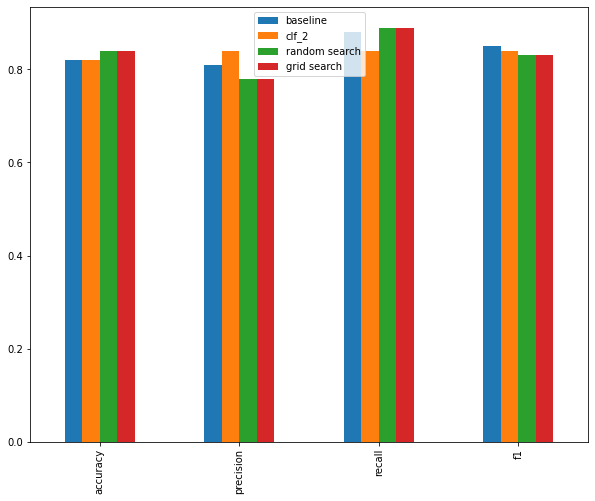

time: 82.6 ms (started: 2022-06-28 01:59:13 +05:30)


In [152]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

It seems, even after trying 72 different combinations of hyperparamters, we don't get an improvement in results.

These things might happen. But it's important to remember, it's not over. There may be more we can do.

In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with RandomizedSearchCV and GridSearchCV but it's likely these improvements will be marginal.

A few next ideas you could try:
* Collecting more data - Based on the results our models are getting now, it seems like they're finding some patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.
* Try a more advanced model - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as [XGBoost](https://xgboost.ai/) or [CatBoost](https://catboost.ai/) might perform better.

Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project.

Now you've got a somewhat tuned Random Forest model, the next thing you might want to do is export it and save it so you could share it with your team or use it in an application without having to retrain it.

## 6. Saving and loading trained machine learning models

Since our `GridSearchCV` model has the best results so far, we'll export it and save it to file.

### 6.1 Saving and loading a model with [`pickle`](https://docs.python.org/3/library/pickle.html)

We saw right at the start, one way to save a model is using Python's [`pickle` module](https://docs.python.org/3/library/pickle.html).

We'll use `pickle`'s `dump()` function and pass it our model, `gs_clf`, along with the `open()` function containing a string for the filename we want to save our model as, along with the `"wb"` string which stands for "write binary", which is the file type `open()` will write our model as.

In [153]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

time: 17.1 ms (started: 2022-06-28 01:59:15 +05:30)


Once it's saved, we can import it using `pickle`'s `load()` function, passing it `open()` containing the filename as a string and `"rb"` standing for "read binary".

In [154]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

time: 14.3 ms (started: 2022-06-28 01:59:21 +05:30)


Once you've reimported your trained model using `pickle`, you can use it to make predictions as usual.

In [155]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

time: 41.1 ms (started: 2022-06-28 01:59:22 +05:30)


You'll notice the reimported model evaluation metrics are the same as the model before we exported it.

### 6.2 Saving and loading a model with [`joblib`](https://joblib.readthedocs.io/en/latest/persistence.html)

The other way to load and save models is with `joblib`. Which works relatively the same as `pickle`.

To save a model, we can use `joblib`'s `dump()` function, passing it the model (`gs_clf`) and the desired filename.

In [156]:
from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib") 

['gs_random_forest_model_1.joblib']

time: 299 ms (started: 2022-06-28 01:59:24 +05:30)


Once you've saved a model using `dump()`, you can import it using `load()` and passing it the filename of the model.

In [157]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

time: 138 ms (started: 2022-06-28 01:59:25 +05:30)


Again, once imported, we can make predictions with our model.

In [158]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

time: 40.5 ms (started: 2022-06-28 01:59:32 +05:30)


You'll notice the evaluation metrics are the same as before.

Which one should you use, `pickle` or `joblib`?

According to [Scikit-Learn's documentation](https://scikit-learn.org/stable/modules/model_persistence.html), they suggest it may be more efficient to use `joblib` as it's more efficient with large numpy array (which is what may be contained in trained/fitted Scikit-Learn models).

Either way, they both function fairly similar so deciding on which one to use, shouldn't cause too much of an issue.

## 7. Revisit the pipeline one more time, knowing what we know now

We've covered a lot. And so far, it seems to be all over the place, which it is. But not to worry, machine learning projects often start out like this. A whole bunch of experimenting and code all over the place at the start and then once you've found something which works, the refinement process begins.

What would this refinement process look like?

We'll use the car sales regression problem (predicting the sale price of cars) as an example.

To tidy things up, we'll be using Scikit-Learn's [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class. You can imagine `Pipeline` as being a way to string a number of different Scikit-Learn processes together.

### 7.1 Creating a regression [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
You might recall when, way back in Section 2: Getting Data Ready, we dealt with the car sales data, to build a regression model on it, we had to encode the categorical features into numbers and fill the missing data.

The code we used worked, but it was a bit all over the place. Good news is, `Pipeline` can help us clean it up.

Let's remind ourselves what the data looks like.

In [159]:
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


time: 6.93 ms (started: 2022-06-28 01:59:37 +05:30)


In [160]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

time: 1.53 ms (started: 2022-06-28 01:59:38 +05:30)


In [161]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

time: 2.09 ms (started: 2022-06-28 01:59:38 +05:30)


There's 1000 rows, three features are categorical (`Make`, `Colour`, `Doors`), the other two are numerical (`Odometer (KM)`, `Price`) and there's 249 missing values.

We're going to have to turn the categorical features into numbers and fill the missing values before we can fit a model.

We'll build a [`Pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to do so.

`Pipeline()`'s main input is `steps` which is a list (`[(step_name, action_to_take)]`) of the step name, plus the action you'd like it to perform.

In our case, you could think of the steps as:
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

Let's do it.

In [162]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

time: 144 ms (started: 2022-06-28 01:59:40 +05:30)


What we've done is combine a series of data preprocessing steps (filling missing values, encoding numerical values) as well as a model into a `Pipeline()`.

Doing so not only cleans up the code, it ensures the same steps are taken every time the code is run rather than having multiple different processing steps happening in different stages.

It's also possible to `GridSearchCV` or `RandomizedSearchCV` with a `Pipeline`.

The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter.

The prefix is the name of the `Pipeline` step you'd like to alter, followed by two underscores.

For example, to adjust `n_estimators` of `"model"` in the `Pipeline`, you'd use: `"model__n_estimators"`.

Let's see it.

In [163]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

time: 57.8 s (started: 2022-06-28 01:59:42 +05:30)


In [164]:
# Score the best model
gs_model.score(X_test, y_test)

0.292308819012865

time: 8.22 ms (started: 2022-06-28 02:00:40 +05:30)


In [165]:
%unload_ext autotime

Beautiful! Using `GridSearchCV` we see a nice boost in our models score. And the best thing is, because it's all in a `Pipeline`, we could easily replicate these results.

## Where to next?

If you've made it this far, congratulations! You've covered a lot of ground in the Scikit-Learn library.

As you might've guessed, there's a lot more that hasn't been covered.

But for the time being, you should be equipped with some of the most useful features of the library to start trying to apply them to your own problems.

Somewhere you might like to look next is to apply what you've learned above to a Kaggle competition. Kaggle competitions are great places to practice your data science and machine learning skills and compare your results with others.

A great idea would be to try to combine the heart disease classification code, as well as the `Pipeline` code, to build a model for the [Titanic dataset](https://www.kaggle.com/c/titanic).

Otherwise, if you'd like to figure out what else the Scikit-Learn library is capable, [check out the documentation](https://scikit-learn.org/stable/user_guide.html).